<a href="https://colab.research.google.com/github/wheemin-2/24-2-ESAA/blob/main/0930_HW_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **평가**

**분류의 성능 평가 지표**

- 정확도 (Accuracy)

- 오차행렬 (Confusion Matrix)
- 정밀도 (Precision)
- 재현율 (Recall)
- F1 score
- ROC AUC

## **정확도(Accuracy)**

실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표

![Accuracy](https://img1.daumcdn.net/thumb/R750x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FIcPSV%2FbtsE42EdoKZ%2FYYYhnCWRNo4imUijAVkED0%2Fimg.png)

직관적으로 모델 예측 성능을 나타내는 평가 지표이지만 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나로만 성능을 평가하지는 않음
    
- 정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 지표가 아님
- e.g. 100개 중 90개의 레이블이 0인 데이터는 무조건 0을 반환하는 ML 모델의 경우라도 정확도가 90%가 됨

In [1]:
# 모듈 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 정확도 지표가 ML 모델의 성능을 왜곡하는 예시

from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 가 1(남성)이면 0, 그렇지 않으면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1

        return pred

In [3]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
# 원본 데이터 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는 : 0.7877


<ipython-input-3-ac8967003126>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-3-ac8967003126>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

남성이면 사망, 여성이면 생존이라고 예측하는 단순한 알고리즘도 정확도가 78%가 나옴 (여성의 생존율이 높았기 때문)

따라서 정확도를 평가 지표로 사용할 때에는 매우 신중해야함


In [5]:
# MNIST 데이터 세트를 통한 정확도의 맹점 확인

from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    # 입력값으로 들어오는 X 데이터 세트의 크기 만큼 모두 0 값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

# MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7인 경우에만 True이고 이를 astype(int)로 변환하여 1로 변환
# MNIST를 불균형한(10% 만 1이 됨) 데이터 세트로 변경
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)   # test_size = 0.25 (default)

In [6]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {0:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900


정확도가 가지는 분류 평가 지표로서의 한계점을 극복하기 위해 여러 가지 분류 지표를 함께 적용하여 ML 모델 성능을 평가해야함



---



## **오차 행렬(Confusion Matrix)**

- 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여줌

 ![Confusion Matrix](https://blog.kakaocdn.net/dn/b2IpXF/btsFg428fEX/Bs2wyHfUKOcjg2AAyUjpKk/img.png)

    - TN : True Negative, 예측값과 실제값이 Negative로 같다
    - T/F : 예측값과 실제값이 "같은가/틀린가" 를 의미
    - N/P : 예측 결과 값이 "부정(0)/긍정(1)" 인지를 의미

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

- MyFakeClassifier : 무조건 Negative(0)으로 예측하는 Classifier

- test dataset : 0이 405건 1이 45건

- TN : 405 (0으로 예측했는데 실제로 0인 데이터 개수)
- FN : 45 (0으로 예측했는데 실제로 1인 데이터 개수)

**오차 행렬상에서 재정의된 정확도**

![accuracy2](https://lh6.googleusercontent.com/proxy/Vjp-JuE1uEufsv_KSIfh1EkY-4ri-7zOLVoXgdKvzSg01UqnEdELsaFfEuak2Vba8opDPpsvwAMjYWPgJzML74KdvL5HsbkmtLgDPqb7cXj7DSZ9ve0Cbg)

## **정밀도와 재현율**

- Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
  
  ** MyFakeClassifier에는 Positive로 예측한 TP 값이 하나도 없으므로 정밀도와 재현율 값이 모두 0

### **정밀도(Precision)**

- 예측을 Positive로 한 대상 중에서 실제값이 Positive로 일치한 데이터의 비율

- Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 "양성 예측도" 라고도 불림

 ![Precision](https://lh3.googleusercontent.com/proxy/nuQWi2o3axbIJMIyeVTIuoxjz-3GbAnSvVZ3UYSqw-cfBNdwdwGjyNXycpaZKSjiAH36n_pJbWpQ67EPK3kfFZTb5lof5JxzPWKqbc5Y0KVIozHE512bjhbakhPHWw)

- 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우에 중요 지표로 사용
    - 즉, FP를 낮추는 데에 집중

    - ex. 스팸메일 판단 모델 (일반 Negative 메일을 스팸 Positive 메일로 분류할 경우에는 리스크가 큼, 반대로 스팸 메일을 일반 메일로 분류하는 경우 사용자가 불편함을 느끼는 정도임)

### **재현율(Recall)**

- 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
- 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불림

 ![Recall](https://lh3.googleusercontent.com/proxy/drn8ByrBtLx8QcbY4-_nL3tMmVMJkKW87pVH_NssAGQeR18sc7Js94IFfOWpMZiFpeu_hNDOxh_VFW6aQ70BaWiqrg6-bKusg9fYAuY_phP6NO1xGrwILlTcoQ)

- 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우에 중요 지표로 사용
    - 즉, FN을 낮추는 데에 집중
    
    - ex. 암 판단 모델 (실제 암 환자를 음성으로 잘못 판단하는 경우 리스크가 심각함, 음성인 경우를 양성으로 예측한 경우에는 재검사 하는 비용만 소모됨)
    - ex2. 금융 사기 적발 모델 (실제 금융 사기 건을 Negative로 잘못 판단하게 되면 손해가 큼, 정상 금융 거래를 사기라고 잘못 판단하더라도 재확인 절차를 가지면 됨)

### **실습**

로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy, precision, recall 평가 수행

In [8]:
# 평가를 한꺼번에 호출하는 get_clf_eval() 함수 생성

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [9]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

# solver : 로지스틱 회귀의 최적화 알고리즘 유형을 지정
# solver='liblinear' : 작은 데이터셋의 이진 분류인 경우 liblinear가 성능이 좋은 경향이 있음
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


<ipython-input-3-ac8967003126>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-3-ac8967003126>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

### **정밀도/재현율 트레이드오프**

- 분류하려는 업무의 특성상 정밀도 혹은 재현율이 특별히 강조되어야 하는 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도/재현율의 수치를 높일 수 있음

- 하지만 정밀도와 재현율은 **상호 보완적인 평가 지표**임

  -> 이를 정밀도/재현율의 트레이드오프(Trade-off)라고 부름

#### **predict_proba()**

In [10]:
# pred_proba() 메서드 : 학습이 완료된 classifier 객체에서 호출, 테스트 피처 데이터의 개별 클래스 예측 '확률'을 반환
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))    # n*p (n:test dataset의 개수, p:클래스 값 유형)
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 concatenate하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])   # P(Y=0), P(Y=1), Y

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


#### **Binarizer()**

In [11]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

# X의 개별 원소들이 threshold 값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [12]:
# Binarizer의 threshold 설정값(분류 결정 임계값)
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼(positive에 해당)만 추출해 Binarizer 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


Logistic Regression Classifier 객체에서 호출된 predict()로 계산된 지표 값과 정확히 동일함 -> predict()가 predict_proba()에 기반함

In [13]:
# Binarizer의 threshold 설정을 0.4로 설정 (분류 결정 임계값을 0.5에서 0.4로 낮춤)
custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1,1) # lr_clf로 예측한 positive의 확률을 열벡터로 reshape
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [14]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 내의 값을 차례로 iteration 하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값: 0.4
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임계값: 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임계값: 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임계값: 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임계값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


#### **precision_recall_curve()**

In [15]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

# 반환된 임계값 배열 row가 147건 이므로 샘플로 10건만 추출하되, 임계값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임계값:', np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index],3))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임계값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도:  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율:  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


임계값이 증가할 수록 정밀도 값은 높아지지만 재현율은 낮아짐

#### **정밀도와 재현율 곡선 시각화**

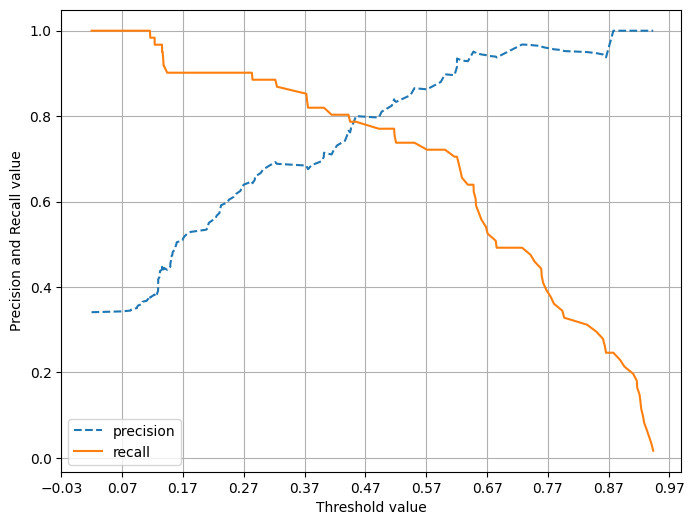

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # X축 : threshold 값, Y축 : precision/recall 값
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    # X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # label, legend, grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

임계값이 낮을 수록 많은 수의 양성 예측으로 인해 재현율(TP/TP+FN)이 극도로 높아지고 정밀도(TP/TP+FP) 값이 극도로 낮아짐

임계값이 높을 수록 재현율 값이 낮아지고 정밀도 값이 높아짐

타이타닉 생존자 예측 모델의 경우 임계값이 약 0.45 지점에서 재현율과 정밀도가 비슷해지는 모습을 보임

### **정밀도와 재현율의 맹점**

정밀도가 100%가 되는 방법

- 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측
    - ex. 환자가 80세 이상이고 비만이며 이전에 암 진단을 받았고 암 세포의 크기가 상위 0.1% 이상이면 무조건 Positive, 다른 경우는 Negative로 예측
- TP/(TP+FP) 에서 FP=0 이 되므로 TP/TP = 1

재현율이 100%가 되는 방법

- 모든 환자를 Positive로 예측

- TP/(TP+FN) 에서 FN=0 이 되므로 TP/TP = 1



---



## **F1 스코어**

- 정밀도와 재현율을 결합한 지표

- 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐

 ![F1 score](https://cdn.prod.website-files.com/5d7b77b063a9066d83e1209c/639c3d2a22f93657640ef19f_f1-score-eqn.webp)


In [17]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [18]:
# 임계값을 변화시키며 F1 스코어를 포함한 평가 지표 구해보기

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.
          format(accuracy, precision, recall, f1))

thresholds = [0.4,0.45,0.5,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.4
오차행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1: 0.7576
임계값: 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1: 0.7869
임계값: 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1: 0.7966
임계값: 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1: 0.7965
임계값: 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1: 0.8000


## **ROC 곡선과 AUC**

**ROC 곡선 (Receiver Operation Characteristic Curve)**

- FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선

- TPR : 재현율(Recall), 민감도(Sensitivity)

- TNR : True Negative Rate, 특이성(Specificity)
    - TN / (TN+FP)

- FPR : FP / (FP+TN), 즉 1 - TNR

**AUC (Area Under Curve)**

- 일반적으로 ROC Curve 자체는 FPR과 TPR의 변화값을 보는데 이용하며 분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정

- 1에 가까울 수록 좋은 수치, AUC 수치가 커지려면 FPR이 작은 상태에서 큰 TPR을 얻어야함


In [19]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 임계값 배열에서 샘플로 데이터 추출, 임계값을 5 step으로 추출
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index:', thr_index)
print('샘플 index로 추출한 임계값: ', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR: ', np.round(fprs[thr_index],3))
print('샘플 임계값별 TPR: ', np.round(tprs[thr_index],3))

샘플 추출을 위한 임계값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임계값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임계값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임계값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


임계값이 1에 가까운 값에서 점점 작아지면서 FPR 값이 커지고 TPR은 가파르게 커짐

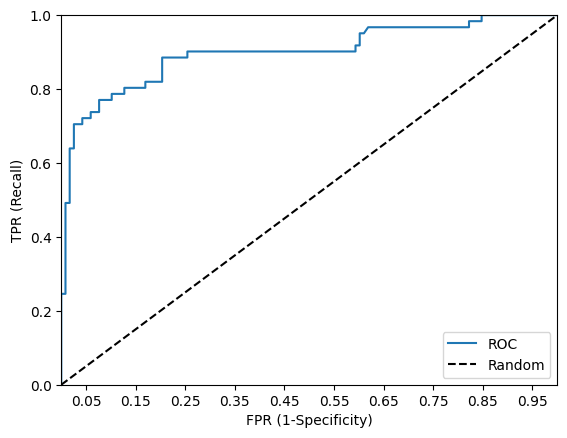

In [20]:
# ROC 곡선(FPR 대비 TPR)으로 시각화

def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR (1-Specificity)'); plt.ylabel('TPR (Recall)')
    plt.legend()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [21]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


In [22]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

### **피마 인디언 당뇨병 예측**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [24]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y 추출
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습/예측/평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926,     F1: 0.6465, AUC:0.8083


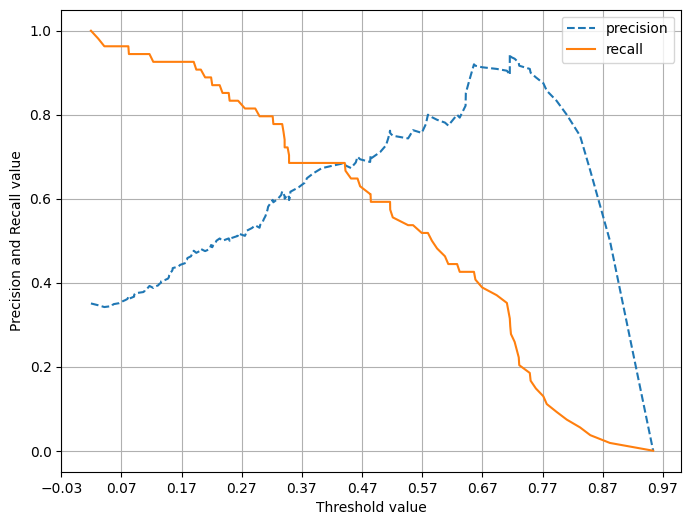

In [26]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [27]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


확인 결과 min 값이 0으로 되어있는 피처가 많음

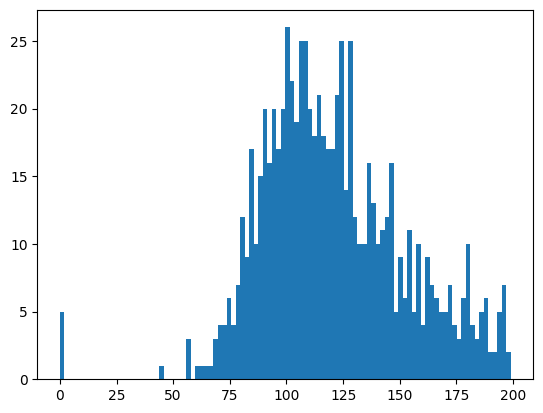

In [28]:
# Glucose에 대한 hist 그려 분포를 확인
plt.hist(diabetes_data['Glucose'],bins=100)
plt.show()

In [29]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.4f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.6510%
BloodPressure 0 건수는 35, 퍼센트는 4.5573%
SkinThickness 0 건수는 227, 퍼센트는 29.5573%
Insulin 0 건수는 374, 퍼센트는 48.6979%
BMI 0 건수는 11, 퍼센트는 1.4323%


In [30]:
# 전체 데이터 건수가 많지 않으므로 0인 값을 모두 삭제한다면 학습이 제대로 되지 않음
# 평균값으로 대체

mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0,mean_zero_features)

In [31]:
# 로지스틱 회귀의 경우, 숫자 데이터를 스케일링하는 것이 좋음
# 스케일링 적용 후 ML 알고리즘 적용, 성능 평가 지표 확인

X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습/예측/평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,     F1: 0.6804, AUC:0.8433


데이터 변환과 스케일링을 통해 성능 수치가 일정 수준 개선됨

재현율 수치는 여전히 개선이 필요해보임 > threshold를 변경 시키면서 재현율 값의 성능 수치가 어느 정도 개선되는지 확인

In [45]:
# 분류 결정 임계값을 0.3에서 0.5까지 0.03씩 변화시키면서 평가 지표 값 출력
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)

임계값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,     F1: 0.6615, AUC:0.8433
임계값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,     F1: 0.6774, AUC:0.8433
임계값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,     F1: 0.6667, AUC:0.8433
임계값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,     F1: 0.6667, AUC:0.8433
임계값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,     F1: 0.6792, AUC:0.8433
임계값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,     F1: 0.6857, AUC:0.8433
임계값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,     F1: 0.6931, AUC:0.8433
임계값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,     F1: 0.6804, AUC:0.8433


In [46]:
# 위에서 ROC-AUC score를 출력하도록 하면서 get_clf_eval 함수가 달라짐
# 이를 반영하여 get_eval_by_threshold 함수 내의 get_clf_eval의 파라미터를 바꿔줌

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list 내의 값을 차례로 iteration 하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [47]:
get_eval_by_threshold(y_test, pred_proba, thresholds)

임계값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,     F1: 0.6615, AUC:0.8433
임계값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,     F1: 0.6774, AUC:0.8433
임계값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,     F1: 0.6667, AUC:0.8433
임계값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,     F1: 0.6667, AUC:0.8433
임계값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,     F1: 0.6792, AUC:0.8433
임계값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,     F1: 0.6857, AUC:0.8433
임계값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,     F1: 0.6931, AUC:0.8433
임계값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,     F1: 0.6804, AUC:0.8433


In [50]:
# 임계값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba)

get_clf_eval(y_test, pred_th_048, pred_proba)

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,     F1: 0.6931, AUC:0.8433
